<a href="https://colab.research.google.com/github/mehraanjali/Kmeans/blob/main/K_Means_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**

In [ ]:
import numpy as np                                # linear algebra
import pandas as pd                               # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                   # for data visualization
import seaborn as sns                             # for statistical data visualization

In [ ]:
data = "/content/Live_20210128(1).csv"

df = pd.read_csv(data)

In [ ]:
# Exploratory data analysis starts

df.shape

(7050, 16)

In [ ]:
# Preview the dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
#view summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [ ]:
#checking for missing values in dataset
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

The important parameters

1.   columns
The columns parameter enables you to specify the columns that you want to delete.
The argument to this parameter can be a single column name or a list of column names. The column names themselves must be enclosed inside quotes.

2.   labels
The labels parameter enables you to specify the rows that you want to delete.
The argument to this parameter can be a single row label or a list of row labels.
The format of the labels depends on how you’ve structured the index. If the labels are integers, the labels you provide will be integers. But if the index labels are strings, then you’ll provide strings to this parameter.

1.   inplace
The inplace parameter enables you to modify your dataframe directly.
Remember: by default, the drop() method produces a new dataframe and leaves the original dataframe unchanged. That’s because by default, the inplace parameter is set to inplace = False.
If you set inplace = True, the drop() method will delete rows or columns directly from the original dataframe. Said differently, if you set inplace = True, Pandas will overwrite your data instead of producing a new dataframe as an output.




In [ ]:
df.drop(['Column1','Column2','Column3','Column4'], axis=1, inplace=True)        #axis = 1 means column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [ ]:
# Viewing the statistical summary of numerical variables
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


While watching the data, we can find that there are 3 categorical variables, need to check

In [ ]:
#get the unique vales of this column

df['status_id'].unique

<bound method Series.unique of 0          1
1          2
2          3
3          4
4          5
        ... 
7045    7046
7046    7047
7047    7048
7048    7049
7049    7050
Name: status_id, Length: 7050, dtype: int64>

In [ ]:
df['status_published'].unique

<bound method Series.unique of 0        4/22/2018 6:00
1       4/21/2018 22:45
2        4/21/2018 6:17
3        4/21/2018 2:29
4        4/18/2018 3:22
             ...       
7045     9/24/2016 2:58
7046    9/23/2016 11:19
7047    9/21/2016 23:03
7048     9/20/2016 0:43
7049    9/10/2016 10:30
Name: status_published, Length: 7050, dtype: object>

In [ ]:
# view how many different types of variables are there
len(df['status_published'].unique())

6913

In [ ]:
## view the labels in the variable

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
len(df['status_type'].unique())

4

Since we can't use status_id and status_published so we can drop it

In [ ]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [ ]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [ ]:
#Declare feature vector and target variable

X = df
y = df['status_type']
df.head()


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [ ]:
# Convert categorical variable into integers

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
X['status_type'] = l.fit_transform(X['status_type'])
y = l.transform(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [ ]:
#Feature Scaling
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

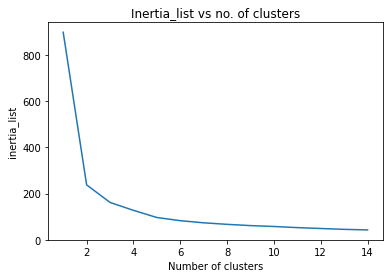

In [ ]:
# Elbow chart to find optimum number of clusters to find the values of k

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia_list = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)
plt.plot(range(1,15),inertia_list)
plt.title('Inertia_list vs no. of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('inertia_list')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

predicted_clusters=kmeans.fit_predict(X)

# check how many of the
#samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


In [ ]:
# Centriods
kmeans.cluster_centers_


array([[9.60808581e-01, 3.57662757e-02, 2.12257291e-02, 2.19584239e-02,
        3.06011015e-02, 3.37134741e-02, 2.42034095e-03, 6.57701120e-03,
        6.39034492e-03, 4.71095497e-03],
       [3.29203110e-01, 1.88437644e-02, 6.48534102e-04, 5.23444525e-04,
        1.83849882e-02, 1.88150929e-03, 1.98733142e-03, 1.12037536e-03,
        2.85828617e-03, 1.52826107e-03],
       [4.05291005e-01, 3.73783574e-01, 2.97919644e-03, 4.08322207e-03,
        3.72184814e-01, 6.35403832e-03, 1.07342697e-02, 2.00181984e-03,
        9.95953937e-04, 2.04813108e-04],
       [1.00000000e+00, 3.20218847e-01, 1.04084240e-01, 1.31991373e-01,
        2.80984267e-01, 2.31378059e-01, 7.83065855e-02, 5.17393435e-02,
        3.13725490e-02, 4.08602151e-02]])

In [ ]:
#Visualization of clusters

#plt.scatter(X[y==0,0], X[y==0,1], s=100, c='red', label='Cluster 1')
#x axis value, y axis value, size , color
#plt.scatter(X[y==1,0], X[y==1,1], s=100, c='blue', label='Cluster 2')
#plt.scatter(X[y==2,0], X[y==2,1], s=100, c='green', label='Cluster 3')
#plt.scatter(X[y==3,0], X[y==3,1], s=100, c='Orange', label='Cluster 4')


#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=30, c='Black', label='Centroid')
#plt.title('Clusters of customers')
#plt.xlabel("different reactions")
#plt.ylabel("Content Type")
#plt.legend(bbox_to_anchor =(1.5,0.5))
#plt.show()

In [ ]:
X['Clusters'] = predicted_clusters
df.head(50)
X["Clusters"].value_counts()
X.Clusters

,Clusters
0,0
1,1
2,0
3,1
4,1
...,...
7045,1
7046,1
7047,1
7048,1


In [ ]:
for cluster in kmeans.cluster_centers_:
  print(cluster,"\n")

[0.96080858 0.03576628 0.02122573 0.02195842 0.0306011  0.03371347
 0.00242034 0.00657701 0.00639034 0.00471095] 

[0.32920311 0.01884376 0.00064853 0.00052344 0.01838499 0.00188151
 0.00198733 0.00112038 0.00285829 0.00152826] 

[4.05291005e-01 3.73783574e-01 2.97919644e-03 4.08322207e-03
 3.72184814e-01 6.35403832e-03 1.07342697e-02 2.00181984e-03
 9.95953937e-04 2.04813108e-04] 

[1.         0.32021885 0.10408424 0.13199137 0.28098427 0.23137806
 0.07830659 0.05173934 0.03137255 0.04086022] 



In [ ]:
X[X["Clusters"]==0]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Clusters
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = X[(X["Clusters"]==0).any(axis=1)]
df2 = X[(X["Clusters"]==1).any(axis=1)]
df3 = X[(X["Clusters"]==2).any(axis=1)]
df4 = X[(X["Clusters"]==3).any(axis=1)]

In [ ]:
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Clusters
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.000000,0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.000000,0
6,1.000000,0.106794,0.029252,0.021028,0.088747,0.106545,0.035971,0.012739,0.000000,0.096774,0
7,1.000000,0.062633,0.021582,0.015479,0.055202,0.048706,0.003597,0.006369,0.000000,0.032258,0
15,1.000000,0.070488,0.004764,0.008762,0.064331,0.035008,0.003597,0.031847,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
6991,0.666667,0.001274,0.000000,0.000292,0.001274,0.000000,0.000000,0.000000,0.000000,0.000000,0
6992,1.000000,0.007643,0.011434,0.005841,0.007006,0.003044,0.003597,0.000000,0.000000,0.000000,0
7015,0.666667,0.013376,0.000000,0.000292,0.013163,0.001522,0.000000,0.000000,0.000000,0.000000,0
7016,0.666667,0.001062,0.000000,0.000000,0.001062,0.000000,0.000000,0.000000,0.000000,0.000000,0


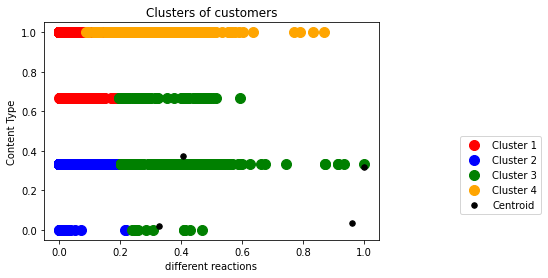

In [ ]:
#Visualization of clusters

plt.scatter(df1["num_reactions"],df1.status_type,  s=100, c='red', label='Cluster 1')
#x axis value, y axis value, size , color
plt.scatter(df2["num_reactions"],df2.status_type,  s=100, c='blue', label='Cluster 2')
plt.scatter( df3["num_reactions"],df3.status_type, s=100, c='green', label='Cluster 3')
plt.scatter(df4["num_reactions"],df4.status_type,  s=100, c='Orange', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=30, c='Black', label='Centroid')
plt.title('Clusters of customers')
plt.xlabel("different reactions")
plt.ylabel("Content Type")
plt.legend(bbox_to_anchor =(1.5,0.5))
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[9.60808581e-01, 3.57662757e-02, 2.12257291e-02, 2.19584239e-02,
        3.06011015e-02, 3.37134741e-02, 2.42034095e-03, 6.57701120e-03,
        6.39034492e-03, 4.71095497e-03],
       [3.29203110e-01, 1.88437644e-02, 6.48534102e-04, 5.23444525e-04,
        1.83849882e-02, 1.88150929e-03, 1.98733142e-03, 1.12037536e-03,
        2.85828617e-03, 1.52826107e-03],
       [4.05291005e-01, 3.73783574e-01, 2.97919644e-03, 4.08322207e-03,
        3.72184814e-01, 6.35403832e-03, 1.07342697e-02, 2.00181984e-03,
        9.95953937e-04, 2.04813108e-04],
       [1.00000000e+00, 3.20218847e-01, 1.04084240e-01, 1.31991373e-01,
        2.80984267e-01, 2.31378059e-01, 7.83065855e-02, 5.17393435e-02,
        3.13725490e-02, 4.08602151e-02]])

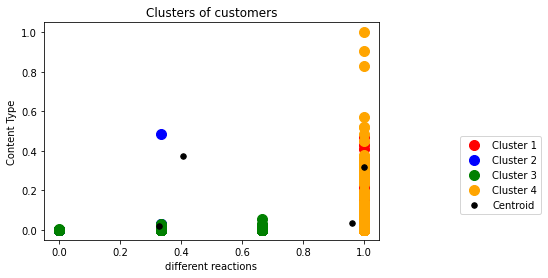

In [ ]:
#Visualization of clusters

plt.scatter(df1.status_type, df1["num_comments"], s=100, c='red', label='Cluster 1')
#x axis value, y axis value, size , color
plt.scatter(df2.status_type, df2["num_comments"], s=100, c='blue', label='Cluster 2')
plt.scatter(df3.status_type, df3["num_comments"], s=100, c='green', label='Cluster 3')
plt.scatter(df4.status_type, df4["num_comments"], s=100, c='Orange', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=30, c='Black', label='Centroid')
plt.title('Clusters of customers')
plt.xlabel("different reactions")
plt.ylabel("Content Type")
plt.legend(bbox_to_anchor =(1.5,0.5))
plt.show()

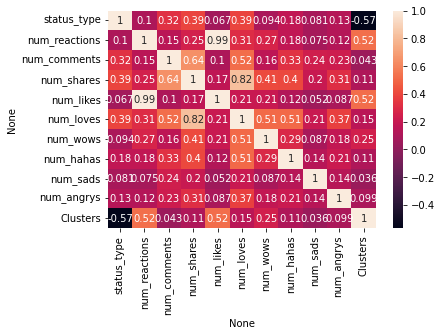

In [ ]:
ax = sns.heatmap(X.corr(), annot=True)

<AxesSubplot:xlabel='num_reactions', ylabel='Density'>

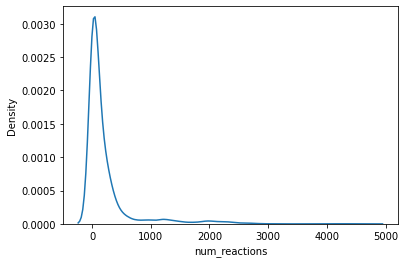

In [ ]:
sns.kdeplot(data=df, x="num_reactions")

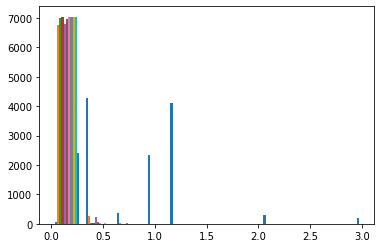

In [ ]:
plt.hist(X)
plt.show()